### Начнем исследовать данные

In [108]:
import pandas as pd
import numpy as np

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
sns.set(rc={'figure.figsize': (9, 6)})

In [111]:
events_data = pd.read_csv('data/event_data_train.zip')

In [112]:
submissions_data = pd.read_csv('data/submissions_data_train.zip')

In [113]:
submissions_data.head(10)

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853
5,31976,1434348188,correct,15853
6,31976,1478852055,correct,15853
7,31977,1434347371,correct,15853
8,31978,1434349981,correct,15853
9,31979,1434446091,correct,15853


In [114]:
events_data.head(10)

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632
5,32811,1434340895,passed,17632
6,32929,1434340921,discovered,17632
7,32929,1434340921,viewed,17632
8,32929,1434340939,started_attempt,17632
9,32929,1434340944,passed,17632


Преобразование даты в привычный вид:

In [115]:
events_data['date'] = pd.to_datetime(events_data.timestamp, unit='s')

In [116]:
events_data.head(10)

,step_id,timestamp,action,user_id,date
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15 04:00:48
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35
5,32811,1434340895,passed,17632,2015-06-15 04:01:35
6,32929,1434340921,discovered,17632,2015-06-15 04:02:01
7,32929,1434340921,viewed,17632,2015-06-15 04:02:01
8,32929,1434340939,started_attempt,17632,2015-06-15 04:02:19
9,32929,1434340944,passed,17632,2015-06-15 04:02:24


In [117]:
events_data['day'] = events_data.date.dt.date

In [118]:
events_data.head(10)

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15
5,32811,1434340895,passed,17632,2015-06-15 04:01:35,2015-06-15
6,32929,1434340921,discovered,17632,2015-06-15 04:02:01,2015-06-15
7,32929,1434340921,viewed,17632,2015-06-15 04:02:01,2015-06-15
8,32929,1434340939,started_attempt,17632,2015-06-15 04:02:19,2015-06-15
9,32929,1434340944,passed,17632,2015-06-15 04:02:24,2015-06-15


In [119]:
submissions_data['date'] = pd.to_datetime(submissions_data.timestamp, unit='s')
submissions_data['day'] = submissions_data.date.dt.date

In [120]:
submissions_data.head(10)

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15
5,31976,1434348188,correct,15853,2015-06-15 06:03:08,2015-06-15
6,31976,1478852055,correct,15853,2016-11-11 08:14:15,2016-11-11
7,31977,1434347371,correct,15853,2015-06-15 05:49:31,2015-06-15
8,31978,1434349981,correct,15853,2015-06-15 06:33:01,2015-06-15
9,31979,1434446091,correct,15853,2015-06-16 09:14:51,2015-06-16


* Cколько пользователей в день были активны на курсе:

Хорошо видно на графике резкое убывание числа пользователей в день после закрытия первой волны курса (когда курс только открылся, существовали дедлайны в этапах обучения). После окончания первый волны курса дедлайны не устанавливались, то есть курс перешел в обычное состояние, когда студент может заниматься в удобном для него режиме.

<AxesSubplot:xlabel='day'>

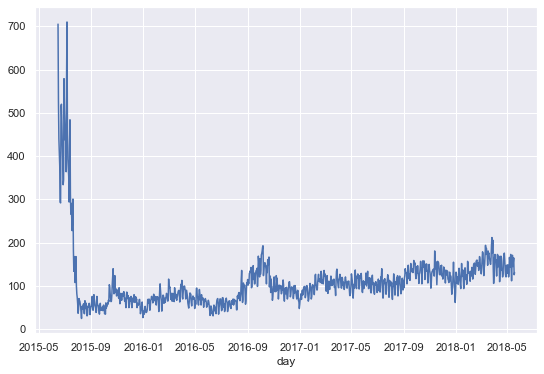

In [121]:
events_data.groupby('day') \
    .user_id.nunique().plot()

* Вывод информации обо всех событиях пользователя

In [122]:
users_events_data = events_data.pivot_table(index='user_id',
                       columns='action',
                       values='step_id',
                       aggfunc='count',
                       fill_value=0).reset_index()

In [123]:
users_events_data.head()

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1


* Вывод информации обо всех попытках решить задание по каждому пользователю

In [124]:
users_scores = submissions_data.pivot_table(index='user_id',
                       columns='submission_status',
                       values='step_id',
                       aggfunc='count',
                       fill_value=0).reset_index()

In [125]:
users_scores.head(10)

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1
5,16,77,106
6,17,0,2
7,22,76,47
8,25,1,4
9,26,7,16


Для каждого пользователя находим разницу по времени между шагами

In [126]:
gaps_data = events_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['day']) \
    .groupby('user_id')['timestamp'].apply(list) \
    .apply(np.diff).values

In [127]:
gaps_data = pd.Series(np.concatenate(gaps_data, axis=0))

90% пользователей возвращается к прохождению курса спустя 15 дней, 10% более - чем через 15 дней

In [128]:
gaps_data.quantile(0.90) / (24 * 60 * 60)

15.203456018518562

In [129]:
# Будем считать, что через 30 днея пользователь "выбывает", если не возвращается к курсу
30 * 24 * 60 * 60

2592000

* Вычисляем id создателя курса по выдвинутой гипотезе о том, что создатель курса, скорее всего, знает столько всевозможных решений задач, что у него (как у пользователя) больше всего корректных решений:

In [130]:
anat_k = users_scores[(users_scores['correct'] == users_scores['correct'].max())]

In [131]:
anat_k

submission_status,user_id,correct,wrong
439,1046,421,513


* Определим, кто из участников курса прошел его, кто выбыл, а кто в процессе обучения:

In [132]:
now = 1526772811 #конечная дата наблюдений в данных
drop_out_threshold = 2592000 #предполагаем, что если пользователь не вернулся на курс через 30 дней, то можно считать его покинувшим курс

In [133]:
events_data.tail()

,step_id,timestamp,action,user_id,date,day
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19
3480702,33892,1526772811,viewed,18526,2018-05-19 23:33:31,2018-05-19


In [134]:
users_data = events_data.groupby('user_id', as_index=False) \
    .agg({'timestamp': 'max'}).rename(columns={'timestamp':'last_timestamp'})

In [135]:
users_data['is_gone_users'] = (now - users_data.last_timestamp) > drop_out_threshold

In [136]:
users_data.head()

,user_id,last_timestamp,is_gone_users
0,1,1472827464,True
1,2,1519226966,True
2,3,1444581588,True
3,5,1499859939,True
4,7,1521634660,True


In [137]:
users_scores.head()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1


In [138]:
users_data = users_data.merge(users_scores, on="user_id", how='outer')

In [139]:
users_data = users_data.fillna(0)

In [140]:
users_data.head()

,user_id,last_timestamp,is_gone_users,correct,wrong
0,1,1472827464,True,0.0,0.0
1,2,1519226966,True,2.0,0.0
2,3,1444581588,True,29.0,23.0
3,5,1499859939,True,2.0,2.0
4,7,1521634660,True,0.0,0.0


In [141]:
users_data = users_data.merge(users_events_data, how='outer')

In [142]:
users_days = events_data.groupby('user_id').day.nunique().to_frame().reset_index()

In [143]:
users_data = users_data.merge(users_days, how='outer')

In [144]:
users_data.head()

,user_id,last_timestamp,is_gone_users,correct,wrong,discovered,passed,started_attempt,viewed,day
0,1,1472827464,True,0.0,0.0,1,0,0,1,1
1,2,1519226966,True,2.0,0.0,9,9,2,10,2
2,3,1444581588,True,29.0,23.0,91,87,30,192,7
3,5,1499859939,True,2.0,2.0,11,11,4,12,2
4,7,1521634660,True,0.0,0.0,1,1,0,1,1


Проверяем данные на наличие потери пользователей:

In [145]:
users_data.user_id.nunique()

19234

In [146]:
events_data.user_id.nunique()

19234

In [147]:
#если пользователь прошел 170 шагов, он получает сертификат (то есть прошел курс успешно)
users_data['passed_corse'] = users_data.passed > 170

In [148]:
users_data.head()

,user_id,last_timestamp,is_gone_users,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_corse
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False


* Сколько человек прошли курс:

In [149]:
users_data.groupby('passed_corse').count()

,user_id,last_timestamp,is_gone_users,correct,wrong,discovered,passed,started_attempt,viewed,day
passed_corse,,,,,,,,,,
False,17809,17809,17809,17809,17809,17809,17809,17809,17809,17809
True,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425


In [150]:
1425 / (1425 + 17809) * 100
# сколько человек в процентах (%) прошли курс

7.408755329104711

Всего 7,4% из 100% пользователей успешно прошли курс, то есть действительно малая часть.

* За сколько дней в среднем люди проходили курс:

In [151]:
users_data[users_data.passed_corse].day.median()

20.0

<AxesSubplot:>

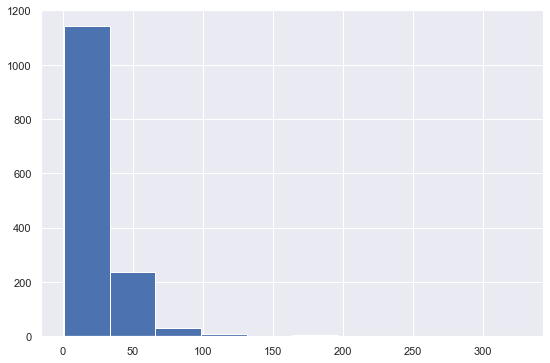

In [152]:
users_data[users_data.passed_corse].day.hist()

* Отбор данных по каждому пользователю за первые 3 дня прохождения курса

In [153]:
user_min_time = events_data.groupby('user_id', as_index=False) \
    .agg({'timestamp':'min'}) \
    .rename({'timestamp':'min_timestamp'}, axis=1)

In [154]:
user_min_time.head()

,user_id,min_timestamp
0,1,1472827464
1,2,1514383364
2,3,1434358476
3,5,1466156809
4,7,1521634660


In [155]:
users_data = users_data.merge(user_min_time, how='outer')

In [156]:
event_data_train = pd.DataFrame()

In [157]:
events_data['user_time'] = events_data.user_id.map(str) + '_' + events_data.timestamp.map(str)

In [158]:
events_data.head()

,step_id,timestamp,action,user_id,date,day,user_time
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895


In [159]:
learning_time_threshold = 3 * 24 * 60 * 60
learning_time_threshold
# 3 дня

259200

In [160]:
user_learning_time_threshold = user_min_time.user_id.map(str) + '_' + (user_min_time.min_timestamp + learning_time_threshold).map(str)

In [161]:
user_min_time['user_learning_time_threshold'] = user_learning_time_threshold

In [162]:
events_data = events_data.merge(user_min_time[['user_id', 'user_learning_time_threshold']], how='outer')

In [163]:
events_data.shape

(3480703, 8)

In [164]:
event_data_train = events_data[events_data.user_time <= events_data.user_learning_time_threshold]

In [165]:
event_data_train.head(10)

,step_id,timestamp,action,user_id,date,day,user_time,user_learning_time_threshold
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895,17632_1434600048
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895,17632_1434600048
5,32811,1434340895,passed,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895,17632_1434600048
6,32929,1434340921,discovered,17632,2015-06-15 04:02:01,2015-06-15,17632_1434340921,17632_1434600048
7,32929,1434340921,viewed,17632,2015-06-15 04:02:01,2015-06-15,17632_1434340921,17632_1434600048
8,32929,1434340939,started_attempt,17632,2015-06-15 04:02:19,2015-06-15,17632_1434340939,17632_1434600048
9,32929,1434340944,passed,17632,2015-06-15 04:02:24,2015-06-15,17632_1434340944,17632_1434600048


In [166]:
event_data_train.shape

(1014985, 8)

Проверяем, не вышли ли наши данные за заданный порог (3 дня прохождения курса пользователями)

In [167]:
event_data_train.groupby('user_id').day.nunique().max()

4

In [168]:
submissions_data['users_time'] = submissions_data.user_id.map(str) + '_' + submissions_data.timestamp.map(str)
submissions_data = submissions_data.merge(user_min_time[['user_id', 'user_learning_time_threshold']], how='outer')
submissions_data_train = submissions_data[submissions_data.users_time <= submissions_data.user_learning_time_threshold]
submissions_data_train.groupby('user_id').day.nunique().max()

4

### Подготовка данных к обучению модели

In [169]:
X = submissions_data_train.groupby('user_id').day.nunique().to_frame().reset_index() \
    .rename(columns={'day':'days'})

In [170]:
steps_tried = submissions_data_train.groupby('user_id').step_id.nunique().to_frame().reset_index() \
    .rename(columns={'step_id':'steps_tried'})

In [171]:
X = X.merge(steps_tried, on='user_id', how='outer')

In [172]:
X.head()

,user_id,days,steps_tried
0,2,1,2
1,3,1,4
2,8,1,11
3,14,1,1
4,16,3,23


In [173]:
X = X.merge(submissions_data_train.pivot_table(index='user_id',
                       columns='submission_status',
                       values='step_id',
                       aggfunc='count',
                       fill_value=0).reset_index())

In [174]:
X['correct_ratio'] = X.correct / (X.correct + X.wrong)
# доля верных ответов во всех ответах

In [175]:
X.head()

,user_id,days,steps_tried,correct,wrong,correct_ratio
0,2,1,2,2,0,1.00
1,3,1,4,4,4,0.50
2,8,1,11,9,21,0.30
3,14,1,1,0,1,0.00
4,16,3,23,23,27,0.46


In [176]:
X = X.merge(event_data_train.pivot_table(index='user_id',
                       columns='action',
                       values='step_id',
                       aggfunc='count',
                       fill_value=0).reset_index()[['user_id', 'viewed']], how='outer')

In [177]:
X = X.fillna(0)

In [178]:
X = X.merge(users_data[['user_id', 'passed_corse', 'is_gone_users']], how='outer')

* Удаляем из данных тех пользователей, которые ещё не бросили курс и не окончили его (то есть тех, кто еще в процессе)

In [179]:
X = X[~((X.passed_corse == False) & (X.is_gone_users == False))]

In [180]:
y = X.passed_corse.map(int)

In [181]:
X = X.drop(['passed_corse', 'is_gone_users'], axis=1)

In [182]:
X = X.set_index(X.user_id)
X = X.drop('user_id', axis=1)

In [183]:
X.head()

,days,steps_tried,correct,wrong,correct_ratio,viewed
user_id,,,,,,
2,1.0,2.0,2.0,0.0,1.00,9
3,1.0,4.0,4.0,4.0,0.50,20
8,1.0,11.0,9.0,21.0,0.30,154
14,1.0,1.0,0.0,1.0,0.00,9
16,3.0,23.0,23.0,27.0,0.46,132


In [184]:
y.head()

0    0
1    0
2    0
3    0
4    1
Name: passed_corse, dtype: int64

* Узнаем, на каком шаге обычно пользователи бросают прохождение курса:

In [185]:
#stop_learning_step
submissions_data[submissions_data['submission_status'] == 'wrong'].groupby(['user_id', 'step_id'], as_index=False) \
    .agg({'timestamp':'max'}).step_id.value_counts()

31978.0    3423
32031.0    3255
31972.0    3064
32202.0    2614
31971.0    2517
           ... 
33681.0     300
31986.0     274
33998.0     251
32175.0     199
32929.0      59
Name: step_id, Length: 76, dtype: int64

In [186]:
submissions_data.sort_values(['user_id', 'timestamp'], ascending=False).drop_duplicates(['user_id'])\
        .query("submission_status == 'wrong'").groupby('step_id')\
        .count().sort_values('submission_status').tail(1)

,timestamp,submission_status,user_id,date,day,users_time,user_learning_time_threshold
step_id,,,,,,,
31978.0,154,154,154,154,154,154,154


### Обучаем несколько моделей и смотрим, насколько они подходят для решения такой задачи, к примеру: определить по первым 3-ём дням прохождения курса пользователем, пройдет ли он его или бросит

In [187]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import precision_score, recall_score, roc_curve, auc, classification_report, confusion_matrix


* Дерево решений:

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [189]:
dt = DecisionTreeClassifier(criterion='entropy')

In [190]:
parameters = {'max_depth': range(3,6), 'max_leaf_nodes':range(6,15), 'min_samples_leaf': range(1,4),'min_samples_split':range(2,5)}

In [191]:
grid_search_cv_clf = GridSearchCV(dt,parameters,cv=4)

In [192]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(criterion='entropy'),
             param_grid={'max_depth': range(3, 6),
                         'max_leaf_nodes': range(6, 15),
                         'min_samples_leaf': range(1, 4),
                         'min_samples_split': range(2, 5)})

In [193]:
model = grid_search_cv_clf.best_estimator_

In [194]:
print(model)
y_pred = model.predict(X_test)
print('precision', precision_score(y_test, y_pred))
print('recall', recall_score(y_test, y_pred))

y_predicted_prob = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)
print('roc_auc', roc_auc)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_leaf_nodes=11)
precision 0.4318181818181818
recall 0.16101694915254236
roc_auc 0.8379057635187268


In [195]:
print("best parameters", grid_search_cv_clf.best_params_)
print('score', grid_search_cv_clf.score(X_test,y_test))
print('cross_val_score', cross_val_score(model,X_train,y_train,cv=4).mean())

best parameters {'max_depth': 5, 'max_leaf_nodes': 11, 'min_samples_leaf': 1, 'min_samples_split': 2}
score 0.931053655824298
cross_val_score 0.9186127328329163


In [196]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3311   50]
 [ 198   38]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      3361
           1       0.43      0.16      0.23       236

    accuracy                           0.93      3597
   macro avg       0.69      0.57      0.60      3597
weighted avg       0.91      0.93      0.92      3597



* Логистическая регрессия:

In [197]:
clf = LogisticRegressionCV(cv=5)
clf.fit(X_train, y_train)

LogisticRegressionCV(cv=5)

In [198]:
y_pred = clf.predict(X_test)
print('precision', precision_score(y_test, y_pred))
print('recall', recall_score(y_test, y_pred))

y_predicted_prob = clf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)
print('roc_auc', roc_auc)

print('score', clf.score(X_test,y_test))
print('cross_val_score', cross_val_score(clf, X_train, y_train, cv=4).mean())

precision 0.46835443037974683
recall 0.15677966101694915
roc_auc 0.8167457980120927
score 0.9329997219905477
cross_val_score 0.9200722824576035


In [199]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3319   42]
 [ 199   37]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      3361
           1       0.47      0.16      0.23       236

    accuracy                           0.93      3597
   macro avg       0.71      0.57      0.60      3597
weighted avg       0.91      0.93      0.92      3597



* Непараметрический алгоритм обучения

In [200]:
knn = KNeighborsClassifier()
parameters = {'n_neighbors': range(15,25), 'leaf_size':range(1,7)}
grid_search_cv_clf = GridSearchCV(knn, parameters, cv=4, n_jobs=-1)
grid_search_cv_clf.fit(X_train, y_train)

model = grid_search_cv_clf.best_estimator_

y_pred = model.predict(X_test)
print('precision', precision_score(y_test, y_pred))
print('recall', recall_score(y_test, y_pred))

y_predicted_prob = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)
print('roc_auc', roc_auc)

print("best parameters", grid_search_cv_clf.best_params_)
print('score', grid_search_cv_clf.score(X_test,y_test))
print('cross_val_score', cross_val_score(model,X_train,y_train,cv=4).mean())

precision 0.35064935064935066
recall 0.11440677966101695
roc_auc 0.7982781052854527
best parameters {'leaf_size': 1, 'n_neighbors': 19}
score 0.9279955518487628
cross_val_score 0.9194467611898804


In [201]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3311   50]
 [ 209   27]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      3361
           1       0.35      0.11      0.17       236

    accuracy                           0.93      3597
   macro avg       0.65      0.55      0.57      3597
weighted avg       0.90      0.93      0.91      3597



##### Итак, немного лучше остальных моделей себя показала логистическая регрессия.
Всё же у всех трёх моделей наблюдаются похожие отклонения: модель хорошо отличает студентов, которые не пройдут курс, но ошибается в определении студентов, которые пройдут курс.

В целом показатели (за исключением точности и полноты) высокие, но это происходит из-за того, что менее 10% пользователей в принципе проходят курс, остальные 90% - нет, то есть распределение классов крайне неравномерно.
Например, метрика, оценивающая качество работы классификатора, вычисляющего вероятность принадлежности объекта к положительному классу, - roc_auc или площадь под графиком ROC-кривой:
* во всех 3-ёх моделях этот показатель примерно равен 0,8 (что является высоким результатом). Но судить об эффективности модели только лишь по этому показателю не стоит по вышеупомянутой причине.
